In [2]:
import torch

# Check if GPU is available
gpu_available = torch.cuda.is_available()
print(f"GPU Available: {gpu_available}")

GPU Available: True


In [3]:
import torch

# Kiểm tra phiên bản CUDA
cuda_version = torch.version.cuda
print(f"CUDA Version: {cuda_version}")

CUDA Version: 12.1


In [4]:
# List of libraries
libraries = [
    "numpy",
    "pandas",
    "blobfile",
    "nibabel",
    "opencv-python",
    "scikit-image",
    "matplotlib",
    "batchgenerators",
    "visdom",
    "torchsummary",
    "tensorboard",
    "medpy",
    "monai"
]

# Write to requirements.txt
with open('requirements.txt', 'w') as file:
    for library in libraries:
        file.write(f"{library}\n")
print("DONE!")

DONE!


### Visualize output

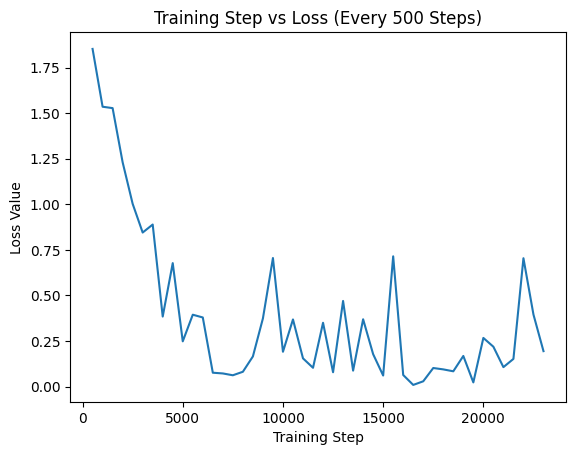

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the TensorFlow event file
log_file = "logs_brats/diffusion_seg_all_loss_embed/events.out.tfevents.1727345655.FIV-PC-Hungbv16.245320.0"

# Lists to store the loss values and steps
steps = []
loss_values = []

# Iterate through the event file to extract loss values
for event in tf.compat.v1.train.summary_iterator(log_file):
    for value in event.summary.value:
        if 'loss' in value.tag:  # Assuming the loss tag contains 'loss'
            if event.step % 500 == 0:  # Only consider every 200 steps
                steps.append(event.step)
                loss_values.append(value.simple_value)

# Plot the training steps and loss values
plt.plot(steps, loss_values)
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Training Step vs Loss (Every 500 Steps)')
plt.show()